# <span style='color:Purple'> Project: Predicting Credit Card Fraud using Machine Learning.

In [3]:
# Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

load Dataset

In [4]:
Credit = pd.read_csv('D:\\data_science_repo\\Credit_Card_Fraud\\creditcard.csv')

head() shows first five rows of each column

In [5]:
Credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


info() shows the information of the dataset

In [6]:
Credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
Credit.isna().sum().sum()

np.int64(0)

There is no null value present in the given dataset

In [8]:
print(Credit.duplicated().sum(),'\n')

print('There is 1081 duplicate data present in the dataset')

1081 

There is 1081 duplicate data present in the dataset


In [9]:
Credit = Credit.drop_duplicates()

In [10]:
print(Credit.duplicated().sum(),'\n')
print('All the duplicated data is droped.\nNow, It do not contain any duplicate data.')

0 

All the duplicated data is droped.
Now, It do not contain any duplicate data.


In [11]:
Credit.shape

print('Number of rows in the given dataset: ',Credit.shape[0])
print('Number of columns in the given dataset: ',Credit.shape[1])

Number of rows in the given dataset:  283726
Number of columns in the given dataset:  31


In [12]:
Credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Visualization 

In [13]:
Credit_1 = Credit[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

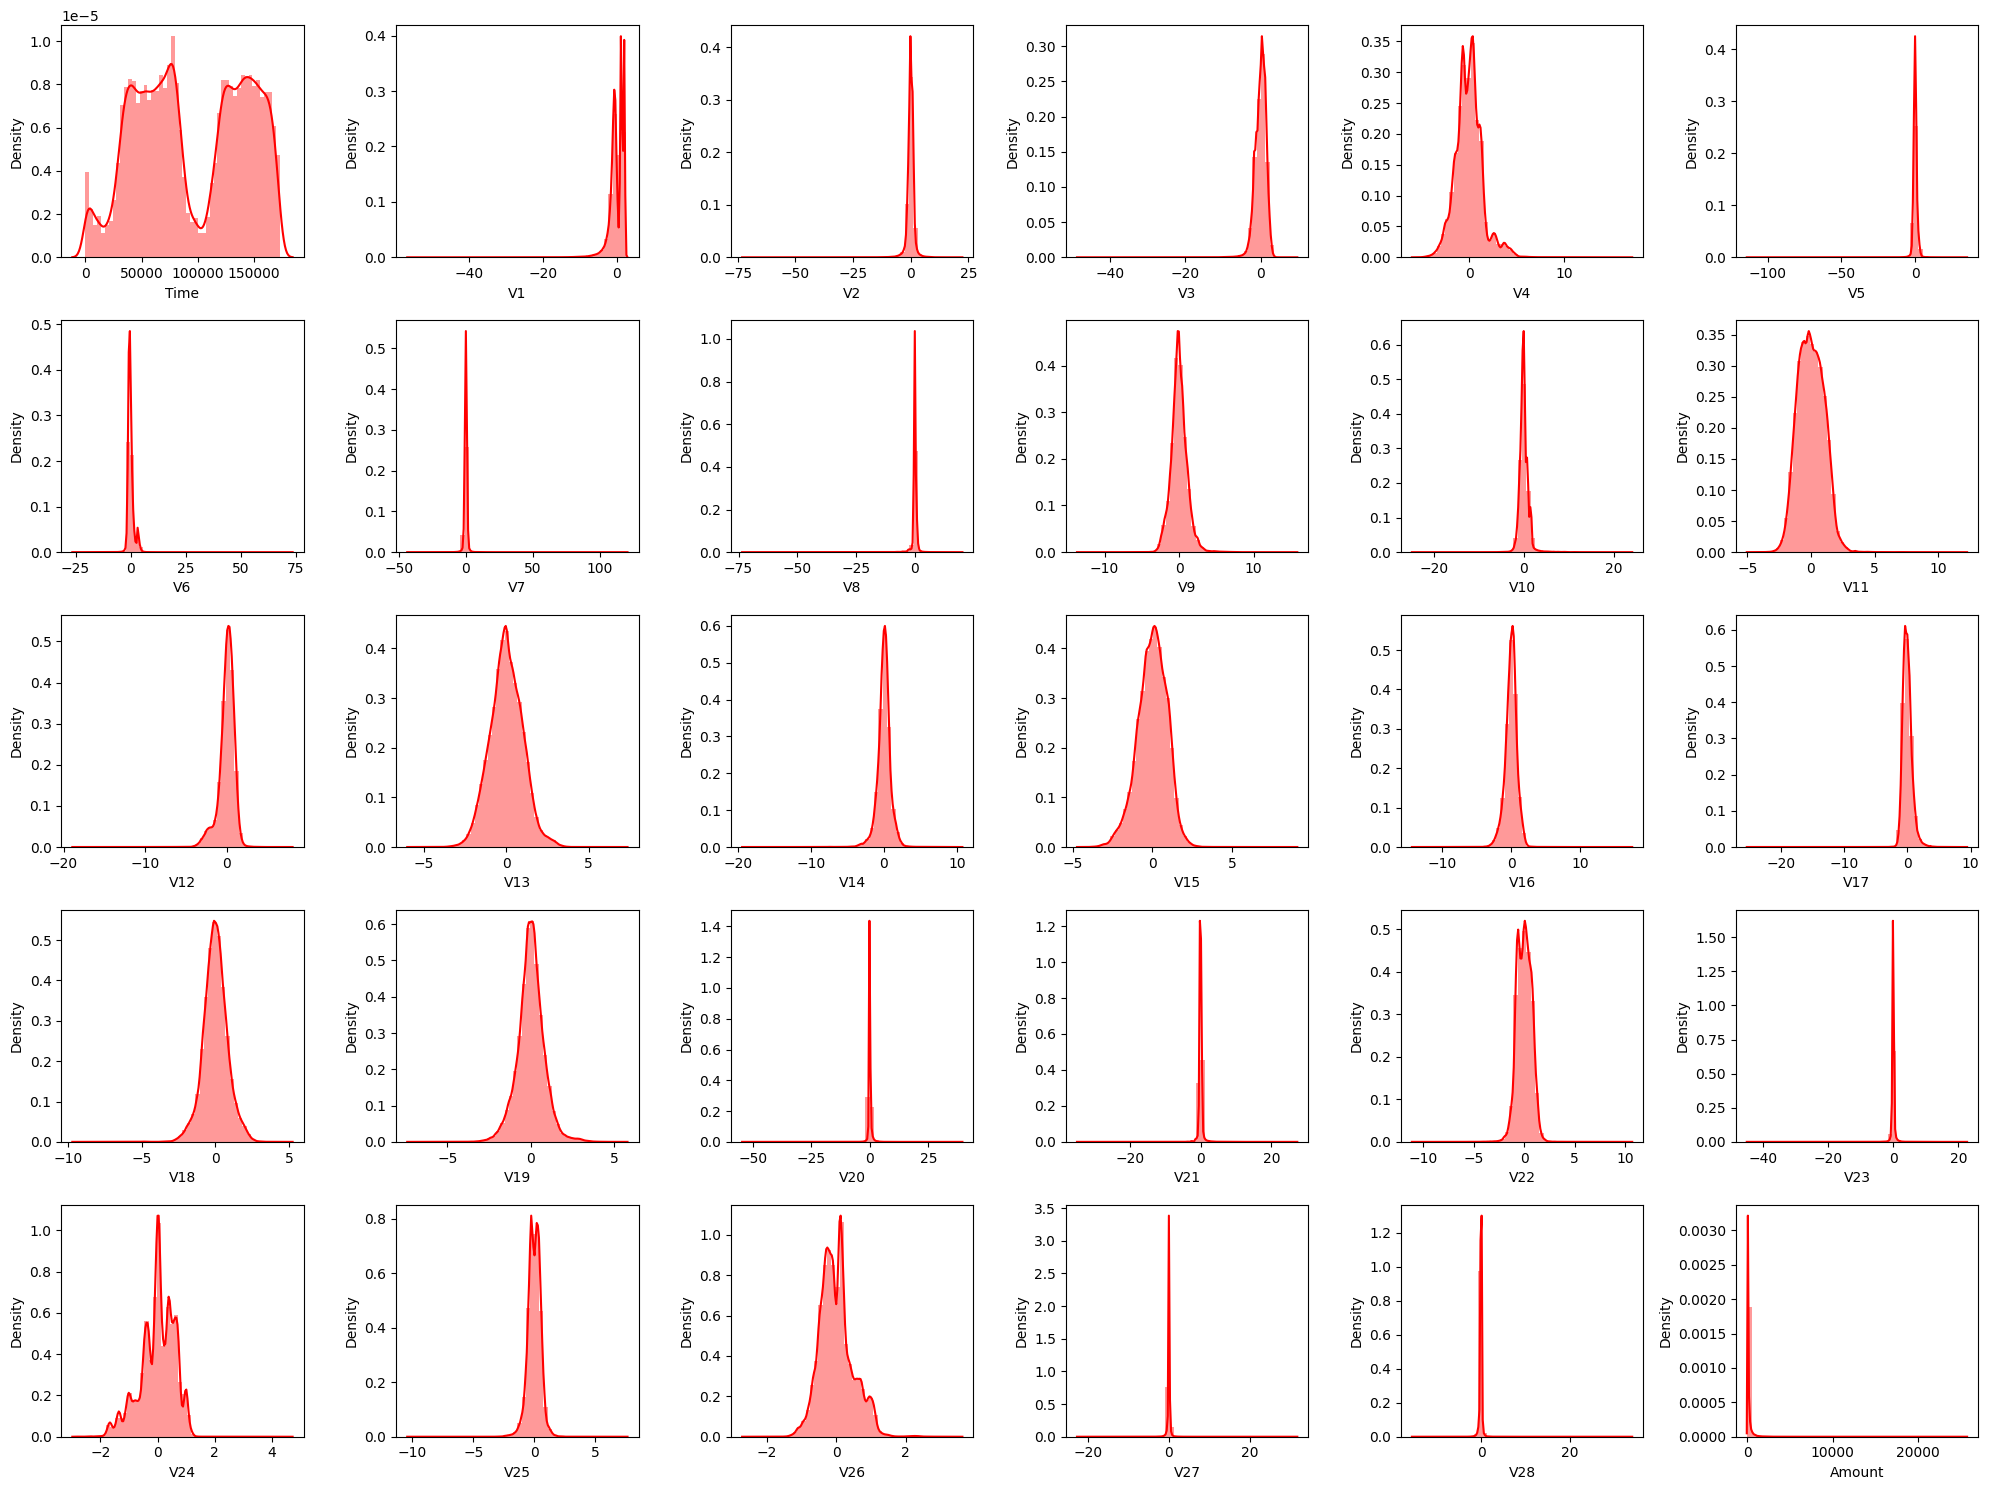

In [29]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in Credit.columns:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        ax = sns.distplot(Credit[i], color='r')    
    plotnumber+=1
plt.tight_layout()
plt.show()

In [15]:
X = Credit[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = Credit['Class']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
Logistic_Regression = LogisticRegression()

In [19]:
Logistic_Regression.fit(X_train, y_train)

LogisticRegression()

In [20]:
Logistic_Regression_Pred = Logistic_Regression.predict(X_test)

In [21]:
accuracy_score(y_test, Logistic_Regression_Pred)

0.9991012582384662

In [22]:
confusion_matrix(y_test, Logistic_Regression_Pred)

array([[56650,     6],
       [   45,    45]])

## Predicting Model

In [23]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [24]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
79119,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,-1.488768,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,318.00
265736,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,-0.419227,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,33.32
42801,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,-0.668365,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,19.99
172689,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,-0.167418,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,6.30
179949,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,-0.657858,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,9.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120348,-0.188193,-3.244306,-1.083455,0.136170,-1.626809,-0.517792,0.786109,-0.401554,-0.642671,0.274674,...,1.137602,0.011795,-1.341362,-0.791988,-0.064471,0.141139,1.038062,-0.238098,0.136452,849.40
260136,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,-0.664895,...,0.045101,-0.326673,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,0.89
132427,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,0.094031,...,-0.003257,0.070189,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,4.50
147428,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,0.008851,...,-0.110161,-0.212230,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,39.48


In [25]:
for i in X_train:
    print(X_train[i][230476])

-0.0997238993578782
2.79541433019956
-6.42385558221477
3.24751301512342
-1.6322902693315
-2.76666493059313
-2.31222288290759
0.961014122482514
-1.89600096481329
-4.91934829935247
3.05365441815753
-5.29781140208753
-1.46602972848647
-7.03588005080407
1.99713237234969
-3.83618852542499
-2.51518280017187
-0.864578711859257
2.32892697361116
0.340898315660141
0.647714388377444
0.126575864283858
0.203953480088146
0.0084949976311171
-0.174501150725926
0.575294798178312
0.152875890788003
-0.0981728103598323
94.82


In [26]:
input_data = (-0.0997238993578782,
2.79541433019956,
-6.42385558221477,
3.24751301512342,
-1.6322902693315,
-2.76666493059313,
-2.31222288290759,
0.961014122482514,
-1.89600096481329,
-4.91934829935247,
3.05365441815753,
-5.29781140208753,
-1.46602972848647,
-7.03588005080407,
1.99713237234969,
-3.83618852542499,
-2.51518280017187,
-0.864578711859257,
2.32892697361116,
0.340898315660141,
0.647714388377444,
0.126575864283858,
0.203953480088146,
0.0084949976311171,
-0.174501150725926,
0.575294798178312,
0.152875890788003,
-0.0981728103598323,
94.82)
np_df = np.asarray(input_data)
prediction = Logistic_Regression.predict(np_df.reshape(1, -1))
if prediction[0]==1:
    print("Fraud Detected")
else:
    print("Fraud Not Detected")

Fraud Detected


In [27]:
import pickle
pickle.dump(Logistic_Regression,open('model.pkl', 'wb'))

In [28]:
Credit['Class'].sort_values(ascending=True)

284803    0
1         0
2         0
3         0
4         0
         ..
280143    1
230476    1
243393    1
214775    1
213116    1
Name: Class, Length: 283726, dtype: int64